In [23]:
#importing necessary modules in python 


#general
import numpy as np
import pandas as pd
import nltk
import random
import os
from PIL import Image

# Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
#the output plot will be directly below the code cell
from subprocess import check_output
#this will allows you to spawn new processes




from wordcloud import WordCloud,STOPWORDS
import warnings
warnings.filterwarnings('ignore')


# Pre-Processing
import string
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords
import re
from nltk.stem import PorterStemmer
from sklearn.metrics import confusion_matrix, classification_report

import nltk

from sklearn.model_selection import train_test_split
from mlxtend.plotting import plot_confusion_matrix
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
#importing the data into python 

path = '/content/drive/My Drive/data science projects/intermediate/sentiment analysis/apple sentiment/Apple-Twitter-Sentiment-DFE.csv'
df = pd.read_csv(path,encoding="ISO-8859-1",)




In [8]:
df.head(1)

,_unit_id,_golden,_unit_state,_trusted_judgments,_last_judgment_at,sentiment,sentiment:confidence,date,id,query,sentiment_gold,text
0,623495513,True,golden,10,NaN,3,0.6264,Mon Dec 01 19:30:03 +0000 2014,5.400000e+17,#AAPL OR @Apple,3\nnot_relevant,#AAPL:The 10 best Steve Jobs emails ever...htt...


In [5]:
print("the shape of the dataframe is:",df.shape)

the shape of the dataframe is: (3886, 12)


###Cleaning the dataframe 


####Removing the unnecessary columns from the datafrme 

In [0]:
df =df.drop(['_unit_id','_golden','_unit_state','_trusted_judgments','_last_judgment_at','sentiment:confidence','date','id','query','sentiment_gold'],axis = 1)


In [10]:
df.sample(4)

,sentiment,text
2956,5,Apple's iPhone 6 Lead-Times Still Longer Than ...
3358,3,RT @TeamCavuto: Protesters stage #DieIn protes...
3602,3,#AAPL:'Fast Money' Recap: Will Oil Companies S...
1759,3,"RT @OneRepublic: Studio at 45,000 ft. One out..."


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 2 columns):
sentiment    3886 non-null object
text         3886 non-null object
dtypes: object(2)
memory usage: 60.8+ KB


here we see that the sentiment is in object  type, we need to convert it to  float with the below code.

In [0]:
df['sentiment'] = pd.to_numeric(df['sentiment'],errors='coerce')

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 2 columns):
sentiment    3804 non-null float64
text         3886 non-null object
dtypes: float64(1), object(1)
memory usage: 60.8+ KB


from the above we see that we are only left with the two columns , sentiment which is in float and text column.

In [0]:
#removing the twitter handles

def remove_pattern(input_txt, pattern):
    r = re.findall(pattern, input_txt)
    for i in r:
        input_txt = re.sub(i, '', input_txt)
        
    return input_txt 

In [0]:
# remove twitter handles (@user)
df['clean_tweets'] = np.vectorize(remove_pattern)(df['text'], "@[\w]*")

In [16]:
df.head(5)

,sentiment,text,clean_tweets
0,3.0,#AAPL:The 10 best Steve Jobs emails ever...htt...,#AAPL:The 10 best Steve Jobs emails ever...htt...
1,3.0,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,RT : Why AAPL Stock Had a Mini-Flash Crash Tod...
2,3.0,My cat only chews @apple cords. Such an #Apple...,My cat only chews cords. Such an #AppleSnob.
3,3.0,I agree with @jimcramer that the #IndividualIn...,I agree with that the #IndividualInvestor sho...
4,3.0,Nobody expects the Spanish Inquisition #AAPL,Nobody expects the Spanish Inquisition #AAPL


Removing Punctuations, Numbers, and Special Characters

In [0]:
df['clean_tweets'] = df['clean_tweets'].str.replace("[^a-zA-Z#]", " ")

In [18]:
df.head(4)

,sentiment,text,clean_tweets
0,3.0,#AAPL:The 10 best Steve Jobs emails ever...htt...,#AAPL The best Steve Jobs emails ever htt...
1,3.0,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,RT Why AAPL Stock Had a Mini Flash Crash Tod...
2,3.0,My cat only chews @apple cords. Such an #Apple...,My cat only chews cords Such an #AppleSnob
3,3.0,I agree with @jimcramer that the #IndividualIn...,I agree with that the #IndividualInvestor sho...


Removing Short Words


Here i am removing the short words like a, an , the, which does not make any sense in the TEXT

In [0]:
df['clean_tweets'] = df['clean_tweets'].apply(lambda x: ' '.join([w for w in x.split() if len(w)>3]))


In [20]:
df.head(5)

,sentiment,text,clean_tweets
0,3.0,#AAPL:The 10 best Steve Jobs emails ever...htt...,#AAPL best Steve Jobs emails ever http
1,3.0,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,AAPL Stock Mini Flash Crash Today AAPL #aapl h...
2,3.0,My cat only chews @apple cords. Such an #Apple...,only chews cords Such #AppleSnob
3,3.0,I agree with @jimcramer that the #IndividualIn...,agree with that #IndividualInvestor should tra...
4,3.0,Nobody expects the Spanish Inquisition #AAPL,Nobody expects Spanish Inquisition #AAPL


In [0]:
#writing a function for preprocessing the text 

def tweet_to_words(tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words ))

In [0]:
df['clean_tweets']=df['clean_tweets'].apply(lambda x: tweet_to_words(x))

In [25]:
df.head(3)

,sentiment,text,clean_tweets
0,3.0,#AAPL:The 10 best Steve Jobs emails ever...htt...,aapl best steve jobs emails ever http
1,3.0,RT @JPDesloges: Why AAPL Stock Had a Mini-Flas...,aapl stock mini flash crash today aapl aapl ht...
2,3.0,My cat only chews @apple cords. Such an #Apple...,chews cords applesnob


Tokenizing

In [26]:
tokenized_tweet = df['clean_tweets'].apply(lambda x: x.split())
tokenized_tweet.head()

0        [aapl, best, steve, jobs, emails, ever, http]
1    [aapl, stock, mini, flash, crash, today, aapl,...
2                            [chews, cords, applesnob]
3    [agree, individualinvestor, trade, apple, aapl...
4        [nobody, expects, spanish, inquisition, aapl]
Name: clean_tweets, dtype: object

Stemming

In [27]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

tokenized_tweet = tokenized_tweet.apply(lambda x: [stemmer.stem(i) for i in x]) # stemming
tokenized_tweet.head()

0          [aapl, best, steve, job, email, ever, http]
1    [aapl, stock, mini, flash, crash, today, aapl,...
2                              [chew, cord, applesnob]
3    [agre, individualinvestor, trade, appl, aapl, ...
4            [nobodi, expect, spanish, inquisit, aapl]
Name: clean_tweets, dtype: object

In [0]:
df['clean_tweets'] = tokenized_tweet

In [29]:
df.sample(4)

,sentiment,text,clean_tweets
109,3.0,RT @HamzeiAnalytics: New HA Blog Post &gt;&gt;...,"[blog, post, final, aapl, putcallratio, monday..."
3195,1.0,Happy Monday! My camera on my fancy @Apple #iP...,"[happi, monday, camera, fanci, iphon, plu, sud..."
913,3.0,Not sure if I want the 6 or the 6 plus @apple ...,"[sure, want, plu, iphon, iphon, plu, iphon, ht..."
892,3.0,@umo_games @Apple ended up getting a new compu...,"[end, get, comput, anyhow, work, comput, switc..."


In [0]:
df["Label"]= 0
df.loc[df.sentiment >= 3,["Label"]]=1

In [37]:
df.sample(4)

,sentiment,text,clean_tweets,Label
1250,3.0,#AAPL:After Years Of Losses Apple Is Finally C...,"[aapl, year, loss, appl, final, claw, back, ma...",1
2742,3.0,-- @Apple Is Figuring Out How To Sell An Arche...,"[figur, sell, archetyp, http, tech, http, vtlua]",1
1722,3.0,#Sketchy #Rumor Claims @Apple [#Apple] Plannin...,"[sketchi, rumor, claim, appl, plan, thursday, ...",1
991,1.0,@BedBathBeyond you're selling this lightning c...,"[sell, lightn, cord, work, accessorymaynotbesu...",0


In [0]:
#creating this so that we can perform word cloud

decode_map = {0: "NEGATIVE",1: "POSITIVE"}
def decode_sentiment(Label):
    return decode_map[int(Label)]

In [0]:

df['label_w']= df.Label.apply(lambda x: decode_sentiment(x))

In [40]:
df.sample(4)

,sentiment,text,clean_tweets,Label,label_w
2641,3.0,#AAPL:iPhone 7 Rumors: Might be Called iPhone ...,"[aapl, iphon, rumor, might, call, iphon, come,...",1,POSITIVE
2183,NaN,@Apple honey crisp apple for the win,"[honey, crisp, appl]",0,NEGATIVE
1956,3.0,"RT @OneRepublic: Studio at 45,000 ft. One out...","[studio, outlet, comput, need, batteri, futur,...",1,POSITIVE
1687,3.0,@OneRepublic @Apple You haven't figured out ...,"[figur, fli, guy]",1,POSITIVE


In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3886 entries, 0 to 3885
Data columns (total 5 columns):
sentiment       3804 non-null float64
text            3886 non-null object
clean_tweets    3886 non-null object
Label           3886 non-null int64
label_w         3886 non-null object
dtypes: float64(1), int64(1), object(3)
memory usage: 151.9+ KB


In [48]:
df.sample()

,sentiment,text,clean_tweets,Label,label_w
3680,1.0,Apple Inc. is doomed. $AAPL dropped by 1.11%! ...,"[appl, doom, aapl, drop, current, price, http,...",0,NEGATIVE


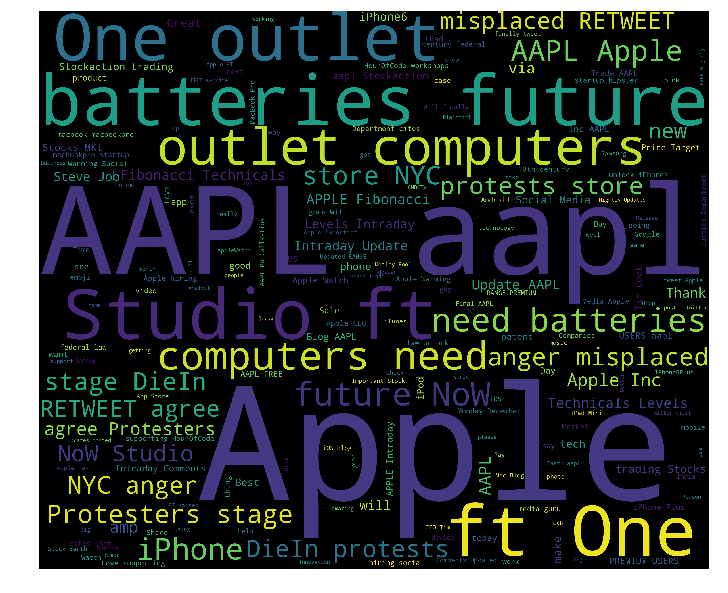

In [47]:
#wordcloud for positive sentiment of tweets

new_df=df[df['label_w']=='POSITIVE']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

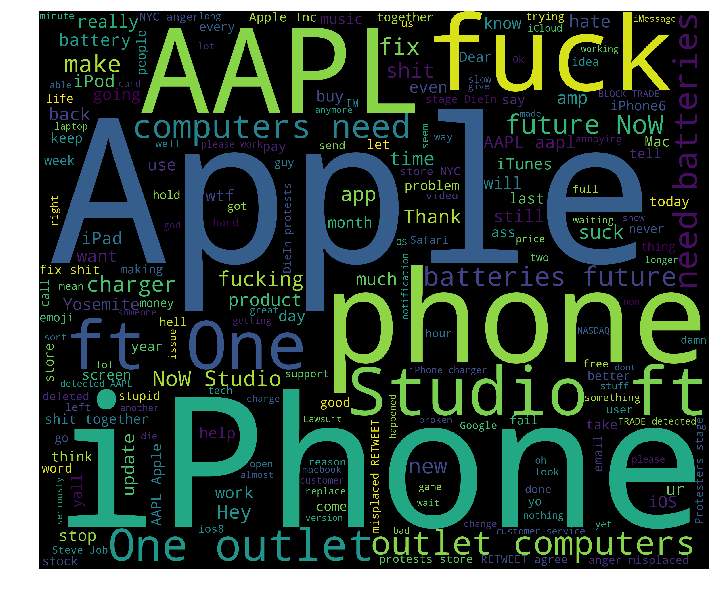

In [49]:
#wordcloud for positive sentiment of tweets

new_df=df[df['label_w']=='NEGATIVE']
words = ' '.join(new_df['text'])
cleaned_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_word)
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

Modeling part

In [50]:
x=df['text']
y=df['Label']
transformer=CountVectorizer(analyzer='word').fit(x) 
x = transformer.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.4, random_state=101)
nb = MultinomialNB()
nb.fit(x_train, y_train)
predict=nb.predict(x_test)
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[356 126]
 [226 847]]


              precision    recall  f1-score   support

           0       0.61      0.74      0.67       482
           1       0.87      0.79      0.83      1073

    accuracy                           0.77      1555
   macro avg       0.74      0.76      0.75      1555
weighted avg       0.79      0.77      0.78      1555



In [57]:
x=df['text']
y=df['Label']
transformer=CountVectorizer(analyzer='word').fit(x) 
x = transformer.transform(x)
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=101)
nb = RandomForestClassifier()
nb.fit(x_train, y_train)
predict=nb.predict(x_test)
print(confusion_matrix(y_test, predict))
print('\n')
print(classification_report(y_test, predict))

[[149  93]
 [ 64 472]]


              precision    recall  f1-score   support

           0       0.70      0.62      0.65       242
           1       0.84      0.88      0.86       536

    accuracy                           0.80       778
   macro avg       0.77      0.75      0.76       778
weighted avg       0.79      0.80      0.79       778



FROM the above we  see that the accuracy of random forest is 80%